In [13]:
#!/usr/bin/env python3

import glob
import os
from os.path import join
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [29]:
train = False
ROOT = '/share/DEEPLEARNING/datasets/monuseg/'
TRAIN_IMG = join(ROOT,'MoNuSegTrainingData')
TEST_IMG = join(ROOT,'MoNuSegTestData')
if train:
    IMGS_DIR = join(TRAIN_IMG,'Tissue_Images')
    MASKS_DIR = join(TRAIN_IMG,'Binary_masks')
    OUTPUT_DIR = join(TRAIN_IMG,'Output')
else:
    IMGS_DIR = join(TEST_IMG,'Tissue_Images')
    MASKS_DIR = join(TEST_IMG,'Binary_masks')
    OUTPUT_DIR = join(TEST_IMG,'Output')
TARGET_SIZE = 51

In [3]:

img_paths = glob.glob(os.path.join(IMGS_DIR, "*.tif"))
mask_paths = glob.glob(os.path.join(MASKS_DIR, "*.png"))
img_paths.sort()
mask_paths.sort()
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
for i, (img_path, mask_path) in enumerate(zip(img_paths, mask_paths)):
    img_filename = os.path.splitext(os.path.basename(img_path))[0]
    mask_filename = os.path.splitext(os.path.basename(mask_path))[0]
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    assert img_filename == mask_filename and img.shape[:2] == mask.shape[:2]
    k = 0
    for y in range(0, img.shape[0], TARGET_SIZE):
        for x in range(0, img.shape[1], TARGET_SIZE):
            img_tile = img[y:y + TARGET_SIZE, x:x + TARGET_SIZE]
            mask_tile = mask[y:y + TARGET_SIZE, x:x + TARGET_SIZE]

            if img_tile.shape[0] == TARGET_SIZE and img_tile.shape[1] == TARGET_SIZE:
                out_img_path = os.path.join(OUTPUT_DIR, "{}_{}.jpg".format(img_filename, k))
                cv2.imwrite(out_img_path, img_tile)

                out_mask_path = os.path.join(OUTPUT_DIR, "{}_{}_m.png".format(mask_filename, k))
                cv2.imwrite(out_mask_path, mask_tile)

            k += 1

    print("Processed {} {}/{}".format(img_filename, i + 1, len(img_paths)))

bruh
bruh
bruh
la
Processed TCGA-2Z-A9J9-01A-01-TS1 1/14
bruh
la
Processed TCGA-44-2665-01B-06-BS6 2/14
bruh
la
Processed TCGA-69-7764-01A-01-TS1 3/14
bruh
la
Processed TCGA-A6-6782-01A-01-BS1 4/14
bruh
la
Processed TCGA-AC-A2FO-01A-01-TS1 5/14
bruh
la
Processed TCGA-AO-A0J2-01A-01-BSA 6/14
bruh
la
Processed TCGA-CU-A0YN-01A-02-BSB 7/14
bruh
la
Processed TCGA-EJ-A46H-01A-03-TSC 8/14
bruh
la
Processed TCGA-FG-A4MU-01B-01-TS1 9/14
bruh
la
Processed TCGA-GL-6846-01A-01-BS1 10/14
bruh
la
Processed TCGA-HC-7209-01A-01-TS1 11/14
bruh
la
Processed TCGA-HT-8564-01Z-00-DX1 12/14
bruh
la
Processed TCGA-IZ-8196-01A-01-BS1 13/14
bruh
la
Processed TCGA-ZF-A9R5-01A-01-TS1 14/14


In [4]:
len(mask_paths)

14

In [5]:
from PIL import Image 

In [20]:
im_p = join(OUTPUT_DIR,'TCGA-AC-A2FO-01A-01-TS1_320.jpg')
mask_p = join(OUTPUT_DIR,'TCGA-AC-A2FO-01A-01-TS1_320_m.png')

In [21]:
im = Image.open(im_p)
m = Image.open(mask_p)

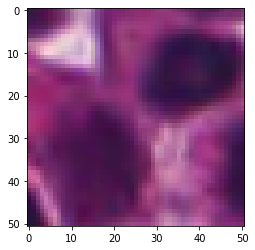

In [22]:
plt.imshow(im)

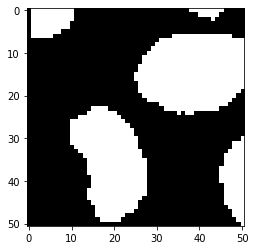

In [23]:
plt.imshow(np.array(m)*255)

In [24]:
print(len([n for n in os.listdir(OUTPUT_DIR) if os.path.isfile(n)]))

0


In [30]:
len(os.listdir(OUTPUT_DIR))

10108